# Kryptografia klasyczna (od starożytności do czasów współczesnych)
### Literatura:
1. Księga szyfrów, Simon Singh, Świat książki, 2001
2. Łamacze kodów, David Kahn, WNT, 2004

## Szyfr Cezara
--------------
Szyfr Cezara oczywiście nie zawdzięcza swego istnienia Juliuszowi Cezarowi. Został przezeń jedynie wspomniany w pamiętnikach o wojnach galijskich. Prawdopodobnie była to dobrze znana metoda w tym czasie.

In [41]:
# Alfabet jawny i szyfrowy 

plaintext = "Zorro fly zealotry zipper"

print("Tekst jawny: ", plaintext)

def caesar(message, key):
    alphabets = ['a','b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p',
            'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

    alphabet_size = 26

    ciphertext = ""

    for text in message.lower().split():
        for char in text:
            ciphertext = ciphertext + alphabets[(alphabets.index(char) + key) % alphabet_size]
    print("Szyfrogram: ",  ciphertext, "(spacje usunięte)")

    decodedtext = ""
    for text in ciphertext:
        for char in text:
            decodedtext = decodedtext + alphabets[(alphabets.index(char)- key) % alphabet_size]
    print("Odszyfrowana wiadomość: ",  decodedtext,  "(spacje usunięte)")

    return ciphertext

caesar(plaintext, 15)

Tekst jawny:  Zorro fly zealotry zipper
Szyfrogram:  odggduanotpadignoxeetg (spacje usunięte)
Odszyfrowana wiadomość:  zorroflyzealotryzipper (spacje usunięte)


'odggduanotpadignoxeetg'

## Szyfr monoalfabetyczny: 
_danemu symbolowi alfabetu jawnego odpowiada dokładnie jeden i ten sam symbol alfabetu tajnego._

### Zastanów się:
1. Czy szyfr Cezara jest łatwy do złamania? Ile prób (testów przesunięć) trzeba aby złamać szyfr Cezara?

Tak, wystarczy tyle prób, ile mamy liter w alfabecie



2. Co to jest atak siłowy (__brute force__)?

Atak polegający na sprawdzeniu wszystkich możliwości

3. Zaproponuj i zaimplementuj wariant szyfru Cezara, która wymaga wykonania większej liczby prób podczas ataku?

Szyfr Cezara, gdzie każda litera jest kodowana innym kluczem, ma inne przesunięcie

In [42]:
import numpy as np

plaintext = "Zorro fly zealotry zipper"
keys = np.random.randint(-26, 27, len(plaintext)).tolist()

def random_caesar(message, keys):
    # Alfabet jawny i szyfrowy
    alphabets = ['a','b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p',
                'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

    alphabet_size = 26

    ciphertext = ""

    print("Tekst jawny: ", plaintext)

    for ind, char in enumerate(message.lower().replace(' ', '')):
        ciphertext = ciphertext + alphabets[(alphabets.index(char) + keys[ind]) % alphabet_size]
    print("Szyfrogram: ",  ciphertext, "(spacje usunięte)")

    decodedtext = ""
    for ind, char in enumerate(ciphertext):
        decodedtext = decodedtext + alphabets[(alphabets.index(char) - keys[ind]) % alphabet_size]
    print("Odszyfrowana wiadomość: ",  decodedtext,  "(spacje usunięte)")

    return ciphertext

random_caesar(plaintext, keys)

Tekst jawny:  Zorro fly zealotry zipper
Szyfrogram:  faxjaepsjeswyrrccpttdc (spacje usunięte)
Odszyfrowana wiadomość:  zorroflyzealotryzipper (spacje usunięte)


'faxjaepsjeswyrrccpttdc'

4. Oceń koszt ataku na ten wariant Cezara.

Pesymistycznie musimy wykonać $ |L|^{n} $ prób, gdzie $ L $ to alfabet, a $ n $ to długość wiadomości

### Zadanie samodzielne dla studentów
1. Napisz ,,ulepszony szyfr Cezara'' czyli monoalfabetyczny szyfr z tajną pemutacją alfabetu szufrowego
2. Można wykorzystać funkcję random.permutation() z biblioteki numpy

In [43]:
# lepszy Cezar
import numpy as np
plaintext = "Zorro fly zealotry zipper"

print("Tekst jawny: ", plaintext)

def better_caesar(message, key):
    alphabet = ['a','b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p',
            'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

    alphabet_size = 26
    ciphertext = ""

    perm_alphabet = np.random.permutation(alphabet).tolist()

    for text in message.lower().split():
        for char in text:
            ciphertext = ciphertext + perm_alphabet[(alphabet.index(char) + key) % alphabet_size]
    print("Szyfrogram: ",  ciphertext, "(spacje usunięte)")

    decodedtext = ""
    for text in ciphertext:
        for char in text:
            decodedtext = decodedtext + alphabet[(perm_alphabet.index(char) - key) % alphabet_size]
    print("Odszyfrowana wiadomość: ",  decodedtext,  "(spacje usunięte)")
    return ciphertext

better_caesar(plaintext, 15)

Tekst jawny:  Zorro fly zealotry zipper
Szyfrogram:  ikaaktgliqjgkhalirwwqa (spacje usunięte)
Odszyfrowana wiadomość:  zorroflyzealotryzipper (spacje usunięte)


'ikaaktgliqjgkhalirwwqa'

## Kryptoanaliza szyfrów monoalfabetycznych

Współcześnie kryptoanaliza szyfru Cezara jest trywialna. Można po prostu sprawdzić wszystkie 26 możliwych przesunięć. 

Szyfry monoalfabetyczne nie są także odporne na __kryptoanalizę statystyczną__. Znając rozkład częstości liter w tekstach napisanych w danym języku możemy odgadnąć przesunięcie obserwując minima i maxima w histogramach. 

W zasadzie kluczową sprawą w obu przypadkach jest znajomość języka, a w gruncie rzeczy alfabetu. 

### Zadanie samodzielne dla studentów
1. Narysuj rozkład częstości występowania liter w języku angielskim (kod rysowania histogramu poniżej)

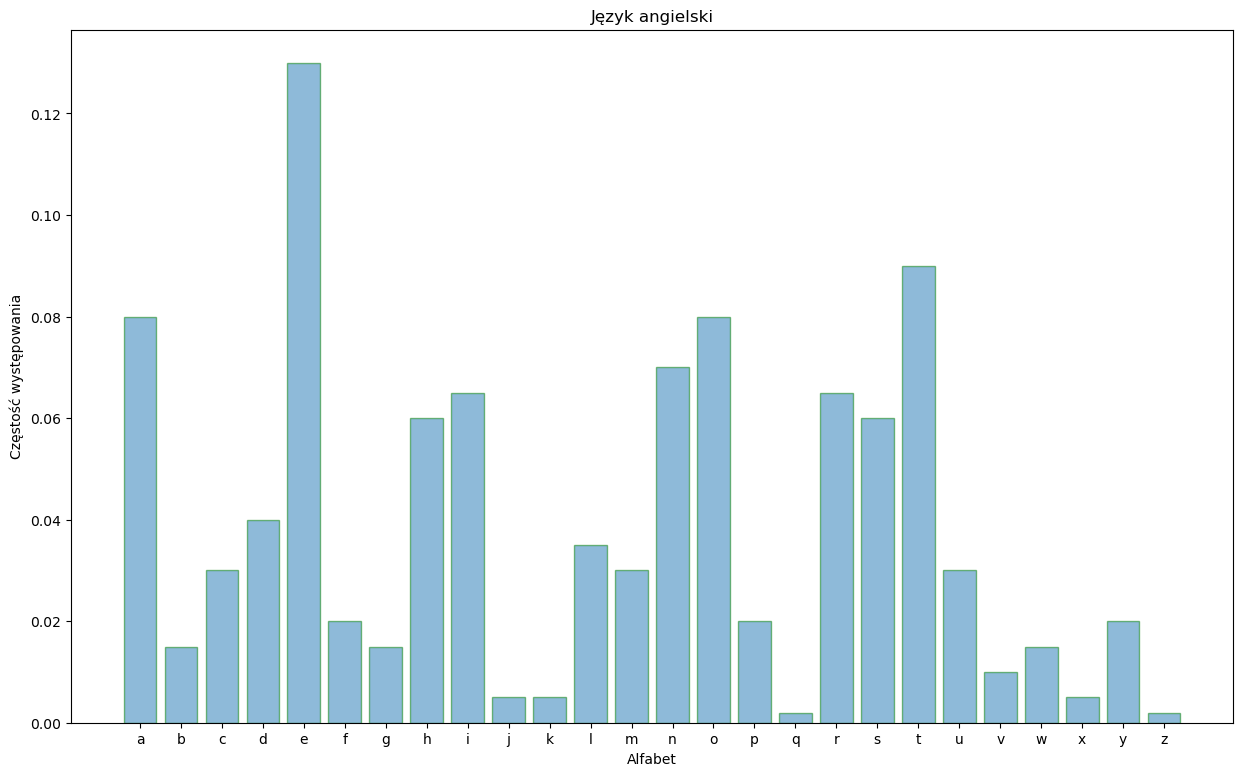

In [44]:
from matplotlib import pyplot as plt
import numpy as np

letters =   ['a',  'b',    'c',   'd',  'e',   'f',   'g',   'h',   'i',   'j',   'k',   'l',    'm',  'n',   'o',   'p',    'q',  'r',   's',   't',   'u',   'v',   'w',   'x',    'y',   'z']
frequency = [0.080, 0.015, 0.030, 0.040, 0.130, 0.020, 0.015, 0.060, 0.065, 0.005, 0.005, 0.035, 0.030, 0.070, 0.080, 0.020, 0.002, 0.065, 0.060, 0.090, 0.030, 0.010, 0.015, 0.005, 0.020, 0.002]
labels = np.arange(len(letters))
plt.figure(figsize=(15,9))
plt.bar(labels, frequency, alpha=0.5, edgecolor="green")
plt.xlabel('Alfabet')
plt.xticks(np.arange(26), ('a','b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'))
plt.title("Język angielski");
plt.ylabel('Częstość występowania')
plt.show()

2. Dokonaj analizy częstości występowania liter w tekście jawnym i szyfrogramie (szyfr Cezara z dowolnym przesunięciem) dla tekstu w poniższym fragmencie kodu. Wyświetl wyniki podobnie jak powyżej.

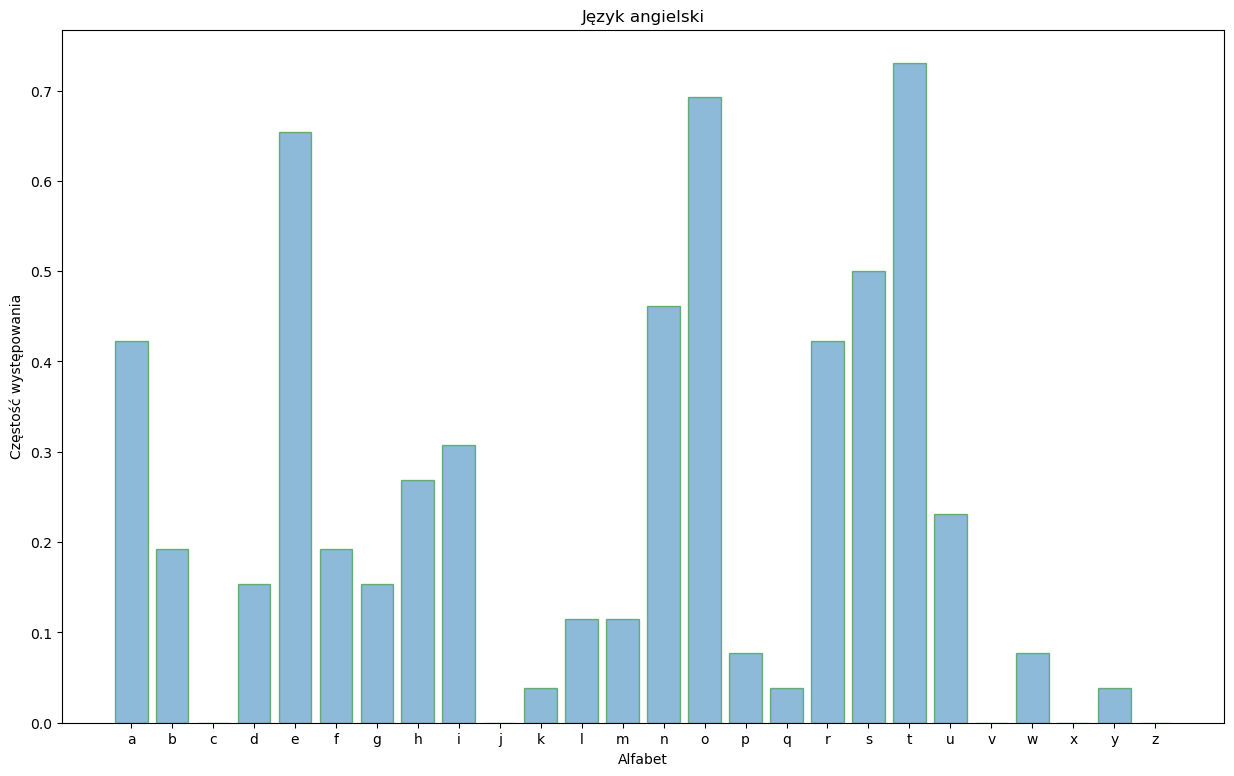

In [45]:
plaintext = "TobeornottobethatisthequestionWhethertisNoblerinthemindtosufferTheSlingsandArrowsofoutrageousFortuneOrtotakeArmsagainstaSeaoftroublesAndbyopposingendthem"

Alphabet = [
    'a','b','c','d','e','f','g','h','i','j','k','l','m',
    'n','o','p','q','r','s','t','u','v','w','x','y','z'
]

# policz częstość i wyświetl rozkłady

def get_letters_frequency(text, alphabet):
    count = [0 for _ in alphabet]

    for char in text.lower():
        count[alphabet.index(char)] += 1

    return list(map(lambda x: x / len(alphabet), count))



letters = ['a',  'b',    'c',   'd',  'e',   'f',   'g',   'h',   'i',   'j',   'k',   'l',    'm',  'n',   'o',   'p',    'q',  'r',   's',   't',   'u',   'v',   'w',   'x',    'y',   'z']
frequency = get_letters_frequency(plaintext, Alphabet)
labels = np.arange(len(letters))
plt.figure(figsize=(15,9))
plt.bar(labels, frequency, alpha=0.5, edgecolor="green")
plt.xlabel('Alfabet')
plt.xticks(np.arange(26), ('a','b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'))
plt.title("Język angielski");
plt.ylabel('Częstość występowania')
plt.show()


Szyfrogram:  idqtdgcdiidqtiwpixhiwtfjthixdclwtiwtgixhcdqatgxciwtbxcsidhjuutgiwthaxcvhpcspggdlhdudjigpvtdjhudgijctdgidipztpgbhpvpxchiphtpduigdjqathpcsqndeedhxcvtcsiwtb (spacje usunięte)
Odszyfrowana wiadomość:  tobeornottobethatisthequestionwhethertisnoblerinthemindtosuffertheslingsandarrowsofoutrageousfortuneortotakearmsagainstaseaoftroublesandbyopposingendthem (spacje usunięte)


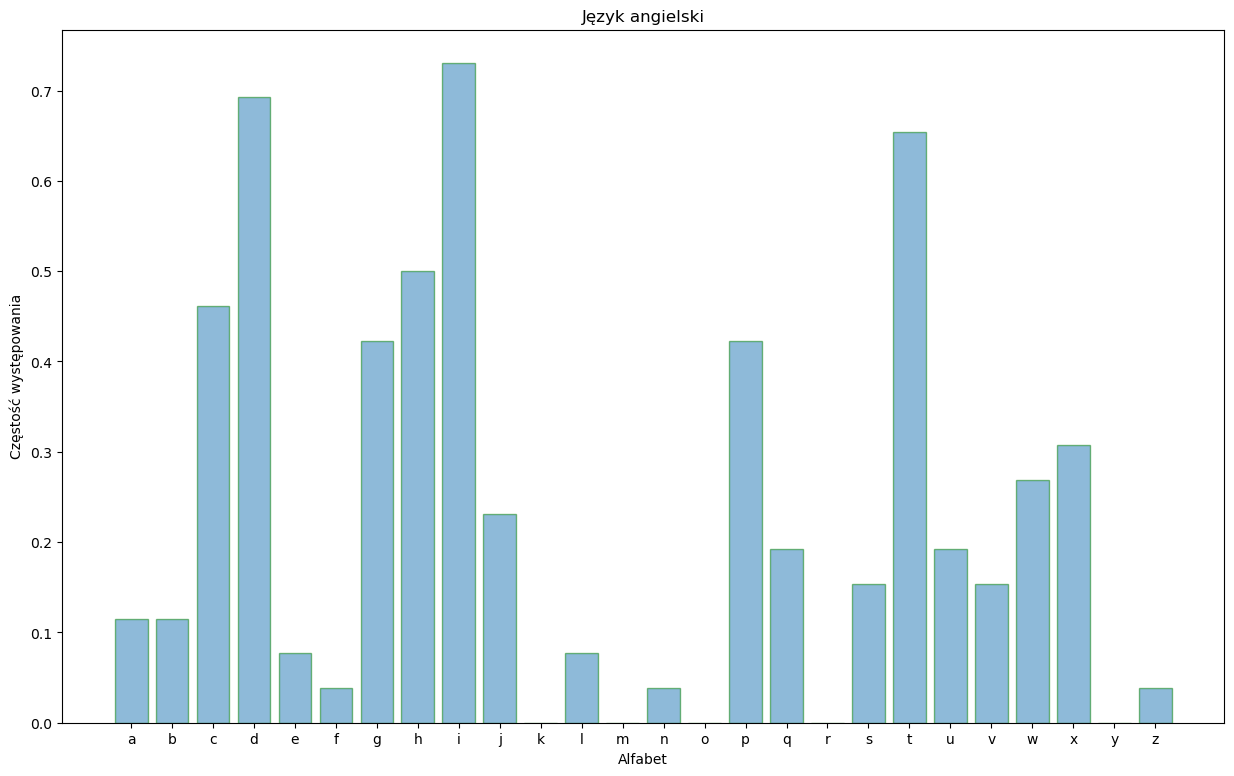

In [46]:
letters = ['a',  'b',    'c',   'd',  'e',   'f',   'g',   'h',   'i',   'j',   'k',   'l',    'm',  'n',   'o',   'p',    'q',  'r',   's',   't',   'u',   'v',   'w',   'x',    'y',   'z']
frequency = get_letters_frequency(caesar(plaintext, 15), Alphabet)
labels = np.arange(len(letters))
plt.figure(figsize=(15,9))
plt.bar(labels, frequency, alpha=0.5, edgecolor="green")
plt.xlabel('Alfabet')
plt.xticks(np.arange(26), ('a','b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'))
plt.title("Język angielski");
plt.ylabel('Częstość występowania')
plt.show()

3. Dokonaj analizy częstości występowania liter w szyfrogramie wygenerowanym przez "ulepszonego Cezara"

Szyfrogram:  oyixyrhyooyixoctopbocxefxbopyhvcxocxropbhyiuxrphocxzphdoybfggxrocxbuphnbthdtrryvbygyfortnxyfbgyrofhxyroyotmxtrzbtntphbotbxtygoryfiuxbthdikyssybphnxhdocxz (spacje usunięte)
Odszyfrowana wiadomość:  tobeornottobethatisthequestionwhethertisnoblerinthemindtosuffertheslingsandarrowsofoutrageousfortuneortotakearmsagainstaseaoftroublesandbyopposingendthem (spacje usunięte)


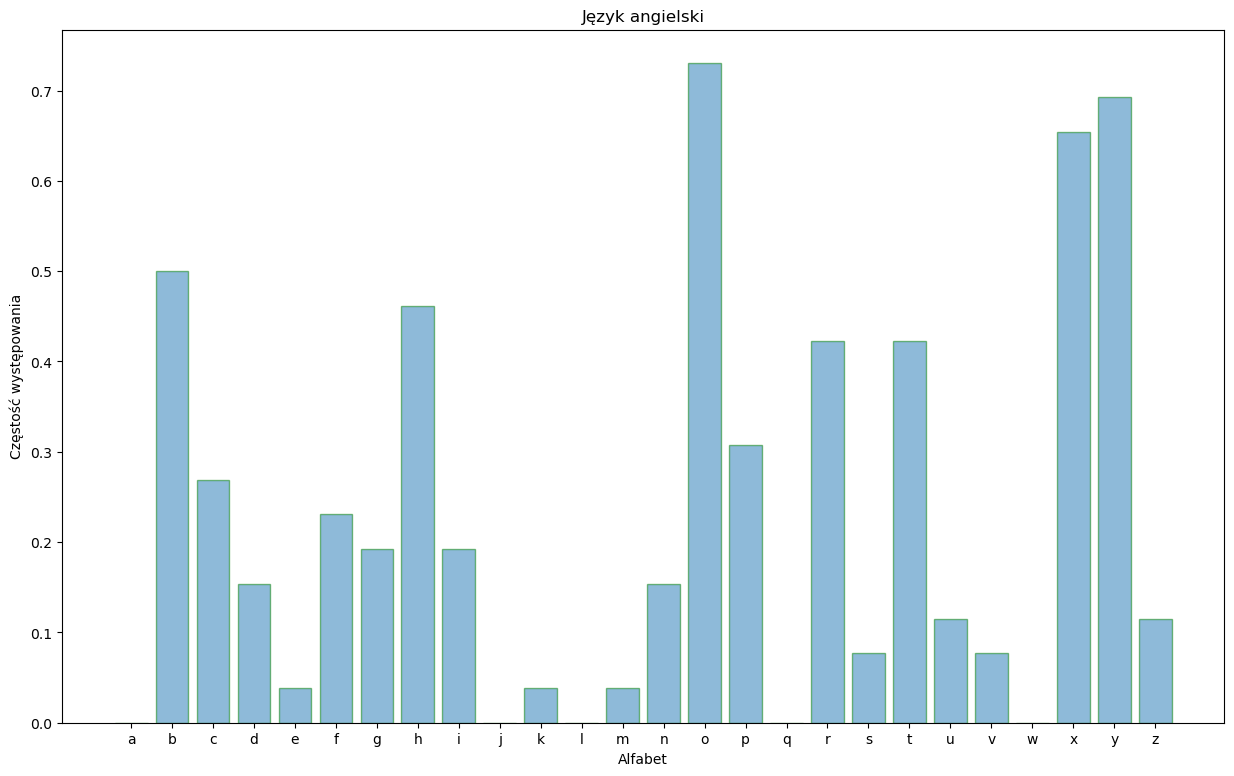

In [47]:
letters = ['a',  'b',    'c',   'd',  'e',   'f',   'g',   'h',   'i',   'j',   'k',   'l',    'm',  'n',   'o',   'p',    'q',  'r',   's',   't',   'u',   'v',   'w',   'x',    'y',   'z']
frequency = get_letters_frequency(better_caesar(plaintext, 15), Alphabet)
labels = np.arange(len(letters))
plt.figure(figsize=(15,9))
plt.bar(labels, frequency, alpha=0.5, edgecolor="green")
plt.xlabel('Alfabet')
plt.xticks(np.arange(26), ('a','b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'))
plt.title("Język angielski");
plt.ylabel('Częstość występowania')
plt.show()

### Ciekawostka: 
Automatyczna kryptoanaliza tekst zaszyfrowanego zwykłym Cezarem

In [48]:
import nltk
nltk.download('words')
from nltk.corpus import words


unique = []
frequency = []
psi = []
key = 0
value = 0.0
exit = True

ciphertext = "odggd".lower()

alphabets = "abcdefghijklmnopqrstuvwxyz"

english_frequency_prob = [0.080, 0.015, 0.030, 0.040, 0.130, 0.020, 0.015, 0.060, 0.065, 0.005, 
                          0.005, 0.035, 0.030, 0.070, 0.080, 0.020, 0.002, 0.065, 0.060, 0.090, 
                          0.030, 0.010, 0.015, 0.005, 0.020, 0.002]



for char in ciphertext: #lista liter w szyfrogramie
    if (char not in unique) and (char.isalpha()):
        unique.append(char)
        
only_alphabets = [char for char in ciphertext if char.isalpha()]  #tylko litery

for unique_char in unique: #częstość liter w tekście 
     frequency.append(ciphertext.count(unique_char) / (float)(len(only_alphabets)))

for i in range(0,26): #oblicz dopasowanie
    for unique_char in unique:
         value = value + frequency[unique.index(unique_char)] * english_frequency_prob[alphabets.index(unique_char) - i]
    psi.append(value)  
    value = 0.0
    
sorted_psi = psi[:] # sortuj dopasowanie
sorted_psi.sort(reverse=True)

decoded_string = ""
for i in range(0, 26):
    key = psi.index(sorted_psi[i])
    decoded_string = ""
    for char in ciphertext:
        if (char != ' '):
            decoded_string = decoded_string + alphabets[alphabets.index(char) - key]
        else:
            decoded_string = decoded_string + " "
            
    print("Próba klucza: ", key, " ....", decoded_string)
    
    for word in decoded_string.split():
        if word not in words.words(): #czy szyfrowanie ma sens
            exit = False
        else:
            exit = True
    if exit:
        break
        
print("\n", "Decoded string: ", decoded_string)

Próba klucza:  25  .... pehhe
Próba klucza:  10  .... etwwt


[nltk_data] Downloading package words to
[nltk_data]     C:\Users\bchwa\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


Próba klucza:  2  .... mbeeb
Próba klucza:  15  .... zorro

 Decoded string:  zorro


## Podsumowanie 
Główną słabością szyfrów monoalfabetycznych jest stałość przekształcenia, dzięki czemu możliwe jest łatwe zaobserwowanie regularności.

Rozwiązaniem może być zmiana alfabetów w trakcie szyfrowania. Dla uproszczenia wystarczy zmieniać jedynie porządek liter. 

### Zadanie samodzielne dla studentów
1. Napisać program, który zmienia alfabet szyfrowania po każdej literze.
_Co będzie potrzebne oprócz tekst jawnego?_
2. Dokonaj analizy częstościowej szyfrogramu zaszyfrowanego szyfrem Vigenera


Szyfrogram:  dzvgnbyivsymyvgkecusrpkwdcecqmgsyvgocnkrxzvndbthvgoxcpcdzmwepplvgodfkmqdupckclqvczzqtdcuidyfmhnbeopdycnqskvycqwduizsymvzcpuqedciwavpmcmnmsqozzmkmqphfsrpg (spacje usunięte)
Odszyfrowana wiadomość:  tobeornottobethatisthequestionwhethertisnoblerinthemindtosuffertheslingsandarrowsofoutrageousfortuneortotakearmsagainstaseaoftroublesandbyopposingendthem (spacje usunięte)
Szyfrogram:  dzvgnbyivsymyvgkecusrpkwdcecqmgsyvgocnkrxzvndbthvgoxcpcdzmwepplvgodfkmqdupckclqvczzqtdcuidyfmhnbeopdycnqskvycqwduizsymvzcpuqedciwavpmcmnmsqozzmkmqphfsrpg (spacje usunięte)
Odszyfrowana wiadomość:  tobeornottobethatisthequestionwhethertisnoblerinthemindtosuffertheslingsandarrowsofoutrageousfortuneortotakearmsagainstaseaoftroublesandbyopposingendthem (spacje usunięte)


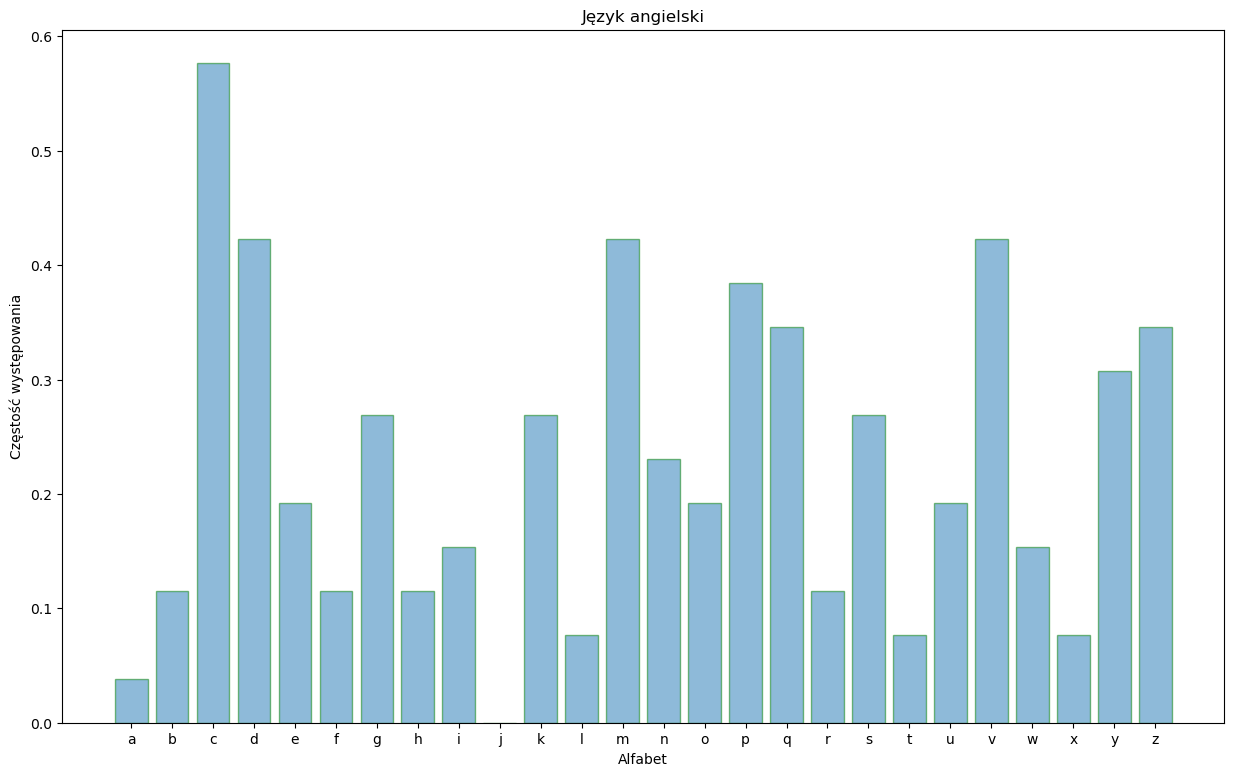

In [49]:
plaintext = "TobeornottobethatisthequestionWhethertisNoblerinthemindtosufferTheSlingsandArrowsofoutrageousFortuneOrtotakeArmsagainstaSeaoftroublesAndbyopposingendthem"
key = "klucz"
ciphertext = ""

def vigenere(message, key):
    alphabet = ['a','b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p',
            'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

    positions = { k: i for i, k in enumerate(alphabet) }

    alphabet_size = 26

    alphabet_matrix = [[] for _ in alphabet]
    for i in range(len(alphabet)):
        for j in range(len(alphabet)):
            alphabet_matrix[i].append(alphabet[(j + i) % alphabet_size])

    long_key = [key[i % len(key)] for i in range(len(message))]

    ciphertext = ""

    for ind, char in enumerate(message.lower().replace(' ', '')):
        offset = positions[long_key[ind]]
        ciphertext = ciphertext + alphabet[(positions[char] + offset) % alphabet_size]
    print("Szyfrogram: ",  ciphertext, "(spacje usunięte)")

    decodedtext = ""
    for ind, char in enumerate(ciphertext):
            offset = positions[long_key[ind]]
            decodedtext = decodedtext + alphabet[positions[char] - offset]
    print("Odszyfrowana wiadomość: ",  decodedtext,  "(spacje usunięte)")

    return ciphertext

vigenere(plaintext,  key)

letters = ['a',  'b',    'c',   'd',  'e',   'f',   'g',   'h',   'i',   'j',   'k',   'l',    'm',  'n',   'o',   'p',    'q',  'r',   's',   't',   'u',   'v',   'w',   'x',    'y',   'z']
frequency = get_letters_frequency(vigenere(plaintext, key), Alphabet)
labels = np.arange(len(letters))
plt.figure(figsize=(15,9))
plt.bar(labels, frequency, alpha=0.5, edgecolor="green")
plt.xlabel('Alfabet')
plt.xticks(np.arange(26), ('a','b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'))
plt.title("Język angielski");
plt.ylabel('Częstość występowania')
plt.show()

### Zastanów się:
1. Sprawdź jak wygląda histogram szyfrogrami.

Nie jest już zwyczajnym przesunięciem

2. Zastanów się jakie znaczenia ma długość klucza dla bezpieczeństwa szyfrowania.

Im dłuższy klucz, tym trudniej rozszyfrować wiadomość

3. Czy powtarzanie klucza można wykorzystać dla potrzeb kryptoanalizy?

Większe bezpieczeństwo zapewnia klucz bez powtórzonych ciągów tych samych znaków, powtarzanie klucza może ułatwić zauważenie wad szyfru, zatem można je wykorzystać dla potrzeb kryptoanalizy

4. Jaki klucz gwarantowałby bezpieczeństwo?

Długi i taki bez powtórzonych ciągów tych samych znaków

5. Jaki rozkład częstości symboli szyfrogramu nie ujawni żadnych przydatnych danych kryptoanalitykowi?

Rozkład jednostajny

### Szyfr polialfabetyczny
_Szyfr używający wielu alfabetów szyfrowych. W trakcie szyfrowania te same litery w tekście jawnym_

### Szyfr doskonały (według Clouda Shannona):
1. Jakie warunki musi spełniać szyfr-nie-do-złamania?
* klucz musi być ciągiem losowym
* klucz musi być jednorazowy
* długość klucza musi być przynajmniej tak samo długa jak długość szyfrowanego tekstu

## Zadanie (dodatkowe, na ocenę)
1. Napisz notebook jupyter, które implementuje klasyczne szyfry mechaniczne: Enigma, szyfr Playfair, szyfr maszyny Lorenza. W sieci można łatwo znaleźć gotowe kody, wiec przy ocenie zwracam uwagę no dokładne omówienie kodu, przejrzystość, komentarze etc.